Program 2
Write a program to demonstrate the working of deep neural network for classification task.

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.5294 - loss: 0.8636 - val_accuracy: 0.5833 - val_loss: 0.8026
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5473 - loss: 0.8500 - val_accuracy: 0.5833 - val_loss: 0.7831
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6322 - loss: 0.8324 - val_accuracy: 0.5833 - val_loss: 0.7601
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6409 - loss: 0.7947 - val_accuracy: 0.5833 - val_loss: 0.7415
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6937 - loss: 0.7591 - val_accuracy: 0.5833 - val_loss: 0.7252
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6657 - loss: 0.7409 - val_accuracy: 0.5833 - val_loss: 0.7074
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6886 - loss: 0.7146 - val_accuracy: 0.5833 - val_loss: 0.6923
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6901 - loss: 0.6945 - val_accuracy: 0.6667 - val_loss: 0.6780
Epoch 9/50

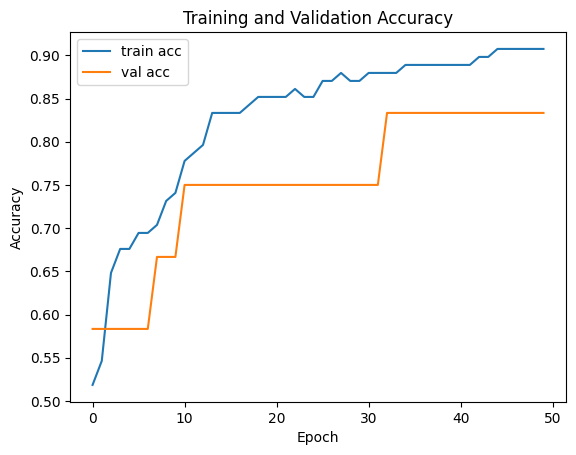

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1,1)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=iris.target_names))

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Program 3
Design and implement a convolutional neural network of image dataset

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


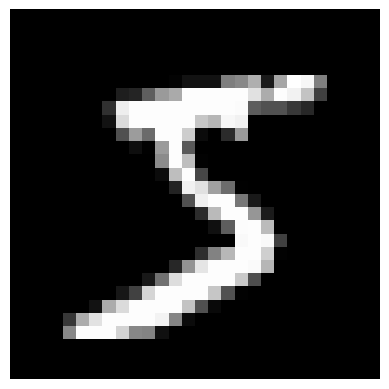

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.8689 - loss: 0.4440 - val_accuracy: 0.9828 - val_loss: 0.0584
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.9816 - loss: 0.0606 - val_accuracy: 0.9865 - val_loss: 0.0449
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.9880 - loss: 0.0383 - val_accuracy: 0.9883 - val_loss: 0.0429
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.9912 - loss: 0.0283 - val_accuracy: 0.9898 - val_loss: 0.0363
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9930 - loss: 0.0214 - val_accuracy: 0.9898 - val_loss: 0.0390
313/313 - 2s - 8ms/step - accuracy: 0.9897 - loss: 0.0326

Test Accuracy: 0.9897


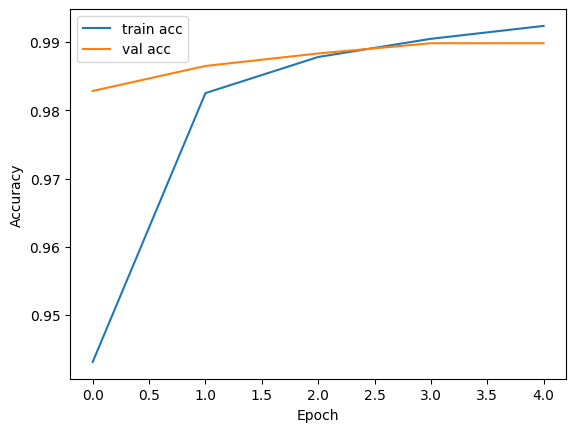

In [29]:
#imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
#pre-processing
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, y_train = x_train / 255.0, y_train
x_test, y_test = x_test / 255.0, y_test
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

plt.imshow(x_train[0].reshape(28,28),cmap='gray')
#plt.title((f"Label:{y_train[0]}"))
plt.axis('off')
plt.show()
#build neural network
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5,
          batch_size=64, validation_split=0.1,
          verbose = 1)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()